In [ ]:
# https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [1]:
#importing libaray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [2]:
#importing data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape

(5110, 12)

In [3]:
#checking some data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#defining a function to plot histogram on specific feature
def show_hist(feature):
    stroke = df[df['stroke']==1][feature].value_counts()
    notstroke = df[df['stroke']==0][feature].value_counts()
    data = pd.DataFrame([stroke,notstroke])
    data.index=['stroke','not stroke']
    data.plot(kind='bar',stacked=True, figsize=(10,5) )

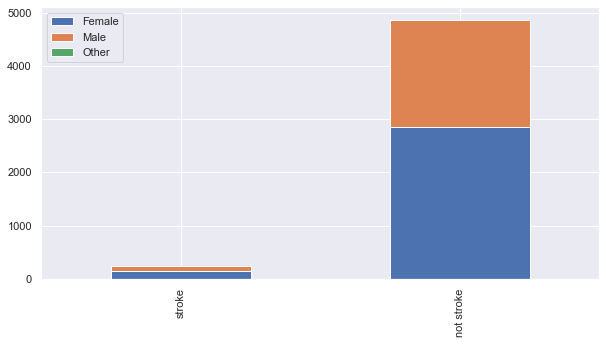

In [5]:
#plotting on gender
show_hist('gender')

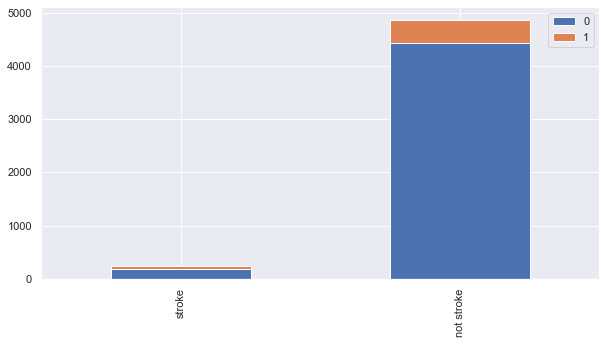

In [6]:
#plotting on hypertension
show_hist('hypertension')

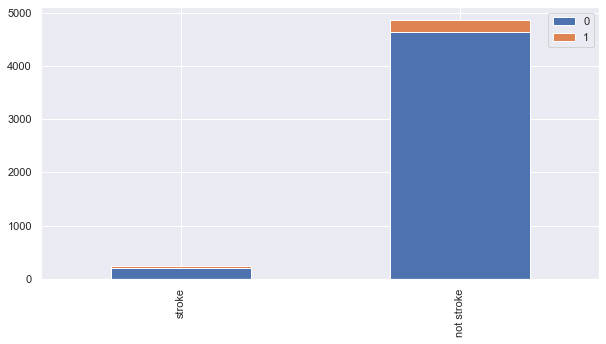

In [7]:
#plotting on heart_disease
show_hist('heart_disease')

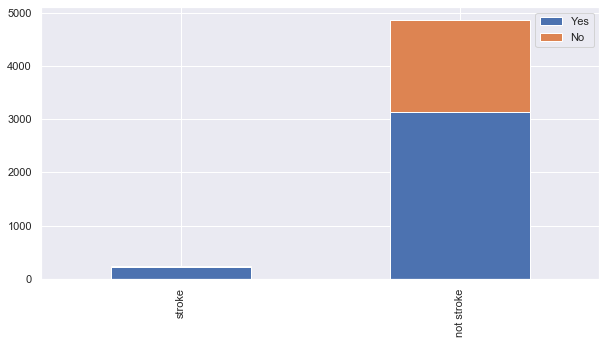

In [8]:
#plotting on heart_disease
show_hist('ever_married')

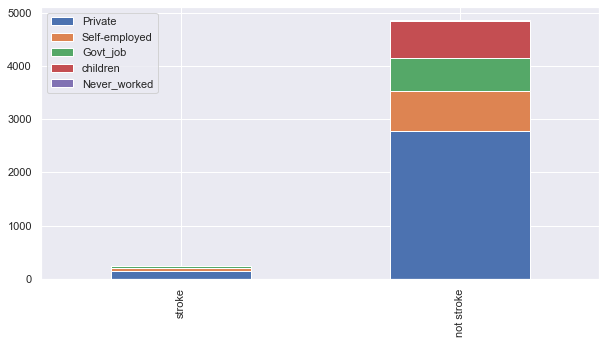

In [9]:
#plotting on heart_disease
show_hist('work_type')

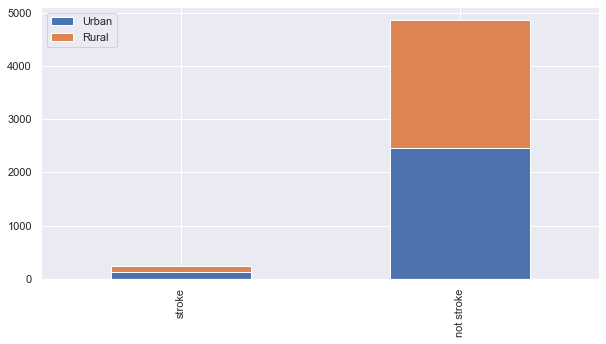

In [10]:
#plotting on Residence_type
show_hist('Residence_type')

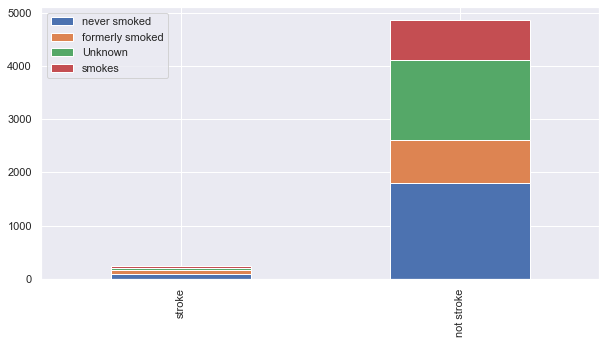

In [11]:
#plotting on Residence_type
show_hist('smoking_status')

In [12]:
#checking null values in dataset
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
#flling null value 
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [14]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [15]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

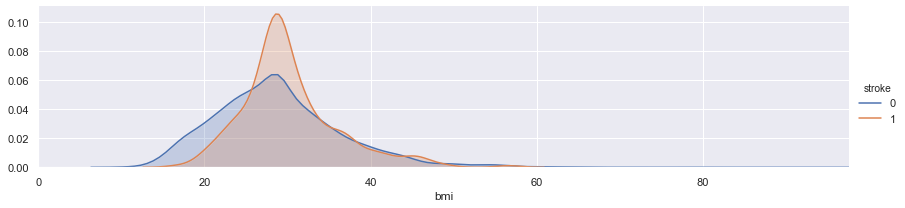

In [16]:
#plotting graph using bmi data
facet = sns.FacetGrid(df, hue="stroke",aspect=4)
facet.map(sns.kdeplot,'bmi',shade= True)
facet.set(xlim=(0, df['bmi'].max()))
facet.add_legend()
 
plt.show()

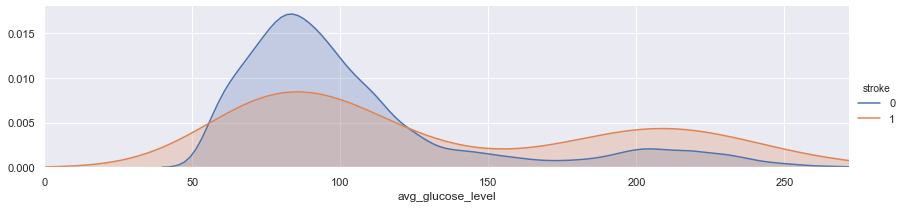

In [17]:
#plotting graph using avg_glucose_level data
facet = sns.FacetGrid(df, hue="stroke",aspect=4)
facet.map(sns.kdeplot,'avg_glucose_level',shade= True)
facet.set(xlim=(0, df['avg_glucose_level'].max()))
facet.add_legend()
 
plt.show() 

In [18]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [19]:
#making a copy of main dataset
modified_dataset = [df]

In [22]:
#making 5 classes in age data
for dataset in modified_dataset:
    dataset.loc[ dataset['age'] <= 16, 'age'] = 0,
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 26), 'age'] = 1,
    dataset.loc[(dataset['age'] > 26) & (dataset['age'] <= 36), 'age'] = 2,
    dataset.loc[(dataset['age'] > 36) & (dataset['age'] <= 62), 'age'] = 3,
    dataset.loc[ dataset['age'] > 62, 'age'] = 4

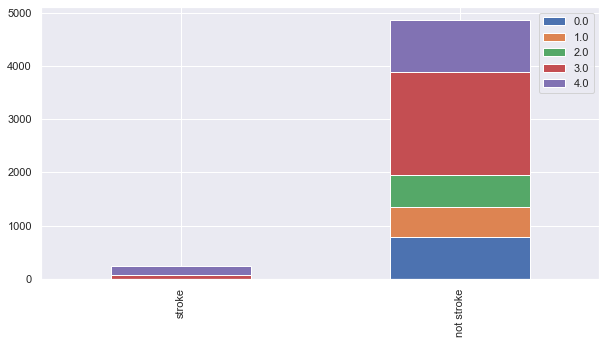

In [21]:
#plotting histogram on age data
show_hist('age')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [23]:
#mapping ever_married data in two class
ever_married_map = {"Yes":1,"No":0}
for dataset in modified_dataset:
    dataset['ever_married'] = dataset['ever_married'].map(ever_married_map)

In [24]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,4.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,3.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,4.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,3.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,4.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


In [25]:
#mapping gender
gender_map = {"Male":1,"Female":0}
for dataset in modified_dataset:
    dataset['gender'] = dataset['gender'].map(gender_map)

In [26]:
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,1.0,4.0,1,0,1,Self-employed,Rural,71.97,28.300000,never smoked,0
5101,36901,0.0,3.0,0,0,1,Private,Urban,97.95,24.500000,Unknown,0
5102,45010,0.0,3.0,0,0,1,Private,Rural,77.93,21.700000,never smoked,0
5103,22127,0.0,1.0,0,0,0,Private,Urban,82.85,46.900000,Unknown,0
5104,14180,0.0,0.0,0,0,0,children,Rural,103.08,18.600000,Unknown,0
5105,18234,0.0,4.0,1,0,1,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,0.0,4.0,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,0.0,2.0,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,1.0,3.0,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0
5109,44679,0.0,3.0,0,0,1,Govt_job,Urban,85.28,26.200000,Unknown,0


In [27]:
#mapping work_type
work_type_map={"Private":1,"Self-employed":2,"Govt_job":3,"children":4,"Never_worked":5}
for dataset in modified_dataset:
    dataset['work_type'] = dataset['work_type'].map(work_type_map)

In [28]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,4.0,0,1,1,1,Urban,228.69,36.600000,formerly smoked,1
1,51676,0.0,3.0,0,0,1,2,Rural,202.21,28.893237,never smoked,1
2,31112,1.0,4.0,0,1,1,1,Rural,105.92,32.500000,never smoked,1
3,60182,0.0,3.0,0,0,1,1,Urban,171.23,34.400000,smokes,1
4,1665,0.0,4.0,1,0,1,2,Rural,174.12,24.000000,never smoked,1


In [29]:
#mapping residence_type
res_type_map = {"Urban":0,"Rural":1}
for dataset in modified_dataset:
    dataset['Residence_type'] = dataset['Residence_type'].map(res_type_map)

In [30]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,4.0,0,1,1,1,0,228.69,36.600000,formerly smoked,1
1,51676,0.0,3.0,0,0,1,2,1,202.21,28.893237,never smoked,1
2,31112,1.0,4.0,0,1,1,1,1,105.92,32.500000,never smoked,1
3,60182,0.0,3.0,0,0,1,1,0,171.23,34.400000,smokes,1
4,1665,0.0,4.0,1,0,1,2,1,174.12,24.000000,never smoked,1
5,56669,1.0,4.0,0,0,1,1,0,186.21,29.000000,formerly smoked,1
6,53882,1.0,4.0,1,1,1,1,1,70.09,27.400000,never smoked,1
7,10434,0.0,4.0,0,0,0,1,0,94.39,22.800000,never smoked,1
8,27419,0.0,3.0,0,0,1,1,1,76.15,28.893237,Unknown,1
9,60491,0.0,4.0,0,0,1,1,0,58.57,24.200000,Unknown,1


In [31]:
#checking info about Residence_type data
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [32]:
#mapping avg_glucose_level data
for dataset in modified_dataset:
    dataset.loc[ dataset['avg_glucose_level'] <= 77.5, 'avg_glucose_level'] = 1,
    dataset.loc[(dataset['avg_glucose_level'] > 77.5) & (dataset['avg_glucose_level'] <= 92), 'avg_glucose_level'] = 2,
    dataset.loc[(dataset['avg_glucose_level'] > 92) & (dataset['avg_glucose_level'] <= 114.5), 'avg_glucose_level'] = 3,
    dataset.loc[ dataset['avg_glucose_level'] > 114.5, 'avg_glucose_level'] = 4

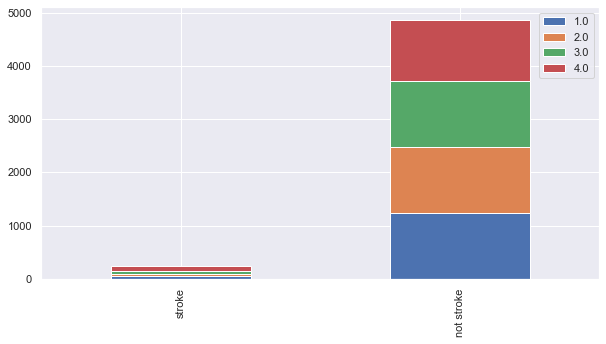

In [33]:
#plotting histogram on avg_glucose_level data
show_hist('avg_glucose_level')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5109 non-null float64
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null int64
work_type            5110 non-null int64
Residence_type       5110 non-null int64
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 479.2+ KB


In [21]:
#mapping bmi data
for dataset in modified_dataset:
    dataset.loc[ dataset['bmi'] <= 18.5, 'bmi'] = 1,
    dataset.loc[(dataset['bmi'] > 18.5) & (dataset['bmi'] <= 24.9), 'bmi'] = 2,
    dataset.loc[(dataset['bmi'] > 24.9) & (dataset['bmi'] <= 29.9), 'bmi'] = 3,
    dataset.loc[ dataset['bmi'] > 29.9, 'bmi'] = 4

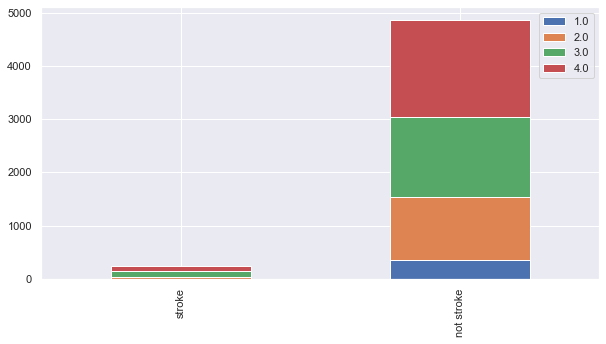

In [36]:
#plotting using bmi data
show_hist('bmi')

In [37]:
#mapping smoking status data
smoke_map = {"never smoked":1,"formerly smoked":2,"Unknown":3,"smokes":4}
for dataset in modified_dataset:
    dataset['smoking_status'] = dataset['smoking_status'].map(smoke_map)

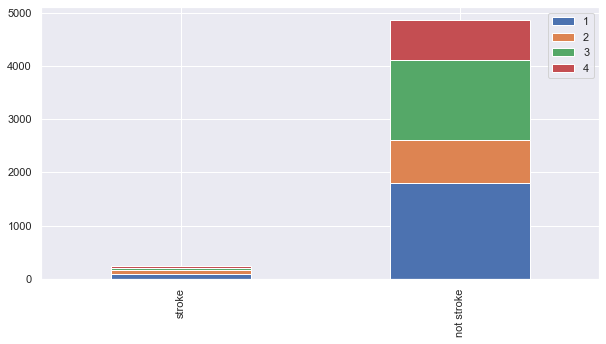

In [38]:
show_hist('smoking_status')

In [39]:
#checking dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5109 non-null float64
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null int64
work_type            5110 non-null int64
Residence_type       5110 non-null int64
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null int64
stroke               5110 non-null int64
dtypes: float64(4), int64(8)
memory usage: 479.2 KB


In [40]:
#convert float64 to float32

df['gender'] = np.float32(df['gender'])
df['age'] = np.float32(df['age'])
df['avg_glucose_level'] = np.float32(df['avg_glucose_level'])
df['bmi'] = np.float32(df['bmi'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5109 non-null float32
age                  5110 non-null float32
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null int64
work_type            5110 non-null int64
Residence_type       5110 non-null int64
avg_glucose_level    5110 non-null float32
bmi                  5110 non-null float32
smoking_status       5110 non-null int64
stroke               5110 non-null int64
dtypes: float32(4), int64(8)
memory usage: 399.3 KB


In [41]:
#checking null value
df.isnull().sum()

id                   0
gender               1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [42]:
df.dropna(inplace=True)

In [43]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
id                   5109 non-null int64
gender               5109 non-null float32
age                  5109 non-null float32
hypertension         5109 non-null int64
heart_disease        5109 non-null int64
ever_married         5109 non-null int64
work_type            5109 non-null int64
Residence_type       5109 non-null int64
avg_glucose_level    5109 non-null float32
bmi                  5109 non-null float32
smoking_status       5109 non-null int64
stroke               5109 non-null int64
dtypes: float32(4), int64(8)
memory usage: 439.1 KB


In [45]:
#seperating features and target

X = df.drop(['id','stroke'],axis=1)
y = df['stroke']

In [46]:
X.shape,y.shape

((5109, 10), (5109,))

In [47]:
#importing library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=.2)
x_train.shape,y_train.shape

((4087, 10), (4087,))

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [50]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring,error_score='raise')
print(score)

[0.92909535 0.94621027 0.92176039 0.93398533 0.94376528 0.91687042
 0.93643032 0.91911765 0.96078431 0.89705882]


In [51]:
# DecisionTree Forest Score
round(np.mean(score)*100, 2)

93.05

In [52]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.92563601 0.93933464 0.93737769 0.94716243 0.92759295 0.94324853
 0.92759295 0.9334638  0.93933464 0.92156863]


In [53]:
# Random Forest Score
round(np.mean(score)*100, 2)

93.42

In [54]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(x_train, y_train)

prediction = clf.predict(x_test)

In [55]:
#import library for accuracy checking
from sklearn.metrics import accuracy_score

In [56]:
#print accuracy
accuracy_score(y_test, prediction)*100

92.66144814090019